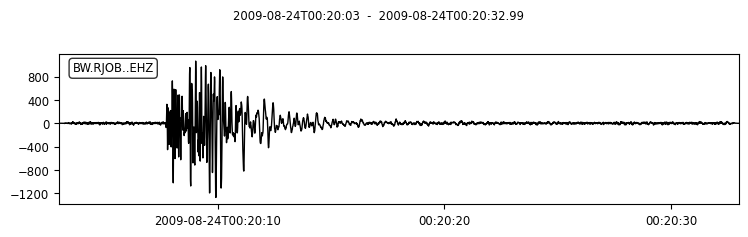

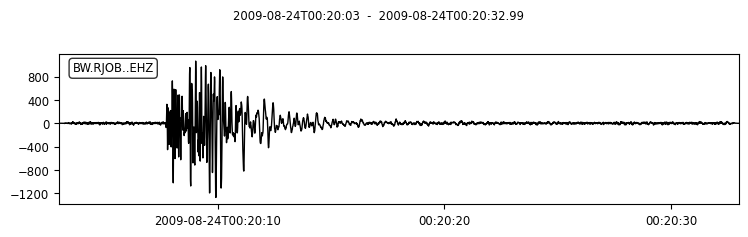

In [1]:
from obspy import read
st = read()  # load example seismogram
st.filter(type='highpass', freq=3.0)
st = st.select(component='Z')
st.plot()

In [4]:
import os
import json
import time
import itertools
import datetime
import cartopy
# Third-party Imports
import numpy
import numpy as np
from scipy import ndimage as nd
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plot
import matplotlib.patches as mpatches
import csep
import comcat
import pandas as pd
from libcomcat.dataframes import get_history_data_frame, split_history_frame, PRODUCTS
from libcomcat.search import get_event_by_id

ModuleNotFoundError: No module named 'comcat'

In [ ]:
from csep.utils import datasets, time_utils, comcat, plots
from csep.core import regions, catalog_evaluations

# set start and end date
start_time = time_utils.strptime_to_utc_datetime('2010-04-08 00:00:00.0')
end_time = time_utils.strptime_to_utc_datetime('2010-04-09 23:59:59.0')
# retrieve events in ComCat catalogue between start and end date
catalog = csep.query_comcat(start_time, end_time)
min_mw = 3.95 # minimum magnitude
max_mw = 8.95 # max magnitude after which is just one bin
dmw = 0.1 # bin width

# Create space and magnitude regions. The forecast is already filtered in space and magnitude
magnitudes = regions.magnitude_bins(min_mw, max_mw, dmw)
region = regions.california_relm_region()

# Bind region information to the forecast 
space_magnitude_region = regions.create_space_magnitude_region(region, magnitudes)


# filter magnitude below 3.95
catalog.filter('magnitude >= 3.95')
# filter events outside spatial region
catalog.filter_spatial(space_magnitude_region)
# print summary information 
print(catalog)

#######################################
# CAGALOGUE SHOULD CONTAIN 10 EVENTS ##
#######################################

In [ ]:
#load forecast
forecast = csep.load_catalog_forecast('u3_fore_2010_04_08.bin',
                                      start_time = start_time,
                                      end_time = end_time,
                                      type='ucerf3',
                                      region = space_magnitude_region,
                                      filter_spatial = True,
                                      apply_filters = True,
                                      filters = 'magnitude >= 3.95')

In [ ]:
evt_counts = forecast.get_event_counts()

In [ ]:
##############################
# Thia sum should be 420734 ##
##############################
np.sum(evt_counts)

In [ ]:
# compute N-test
number_test_result = catalog_evaluations.number_test(forecast, catalog)

In [ ]:
##################################################################
## results should be delta_1 = 0.08, delta_2 = 0.93, omega = 10 ##
################################################################## 
ax = number_test_result.plot()

In [ ]:
#calculate expected rates per space-magnitude bin
expected_rates = forecast.get_expected_rates(verbose=True)

In [ ]:
args_forecast = {'title': 'Landers aftershock forecast',
                 'grid_labels': True,
                 'borders': True,
                 'feature_lw': 0.5,
                 'basemap': 'ESRI_imagery',
                 'cmap': 'rainbow',
                 'alpha_exp': 0.9,
                 'projection': cartopy.crs.Mercator(),
                 'clim':[-9, 0]}
args_catalog = {'basemap': 'ESRI_terrain',
                'markercolor': 'black',
                'markersize': 4}
ax_1 = expected_rates.plot(plot_args=args_forecast)
ax_2 = catalog.plot(ax=ax_1, plot_args=args_catalog)
#########################################################
# Image only has observations in the right side corner ##
#########################################################